# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i > 0):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | mandali
Processing Record 5 of Set 1 | takoradi
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | chaiyaphum
Processing Record 8 of Set 1 | kannus
Processing Record 9 of Set 1 | novo aripuana
Processing Record 10 of Set 1 | shenjiamen
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | narasannapeta
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | knyaze-volkonskoye
Processing Record 16 of Set 1 | pariang
City not found. Skipping...
Processing Record 17 of Set 1 | iwanai
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | college
Processing Record 22

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,25.30,82,99,5.71,GQ,1729891520
1,port-aux-francais,-49.3500,70.2167,2.25,67,58,10.73,TF,1729891521
2,waitangi,-43.9535,-176.5597,14.34,98,92,1.34,NZ,1729891522
3,mandali,33.7499,45.5541,17.49,22,0,3.44,IQ,1729891523
4,takoradi,4.8845,-1.7554,25.74,91,100,3.88,GH,1729891227


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,25.30,82,99,5.71,GQ,1729891520
1,port-aux-francais,-49.3500,70.2167,2.25,67,58,10.73,TF,1729891521
2,waitangi,-43.9535,-176.5597,14.34,98,92,1.34,NZ,1729891522
3,mandali,33.7499,45.5541,17.49,22,0,3.44,IQ,1729891523
4,takoradi,4.8845,-1.7554,25.74,91,100,3.88,GH,1729891227


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

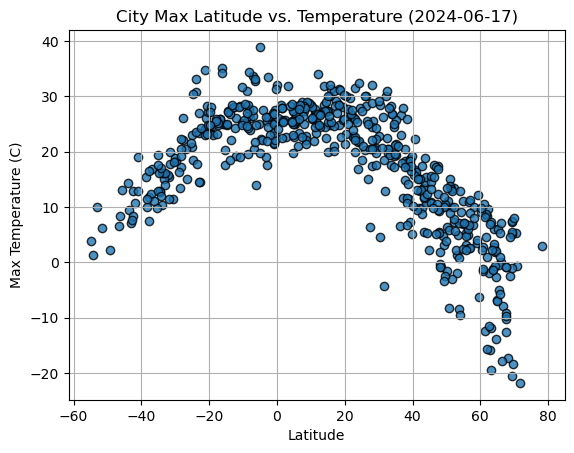

In [11]:
# Build scatter plot for Latitude vs. Max Temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

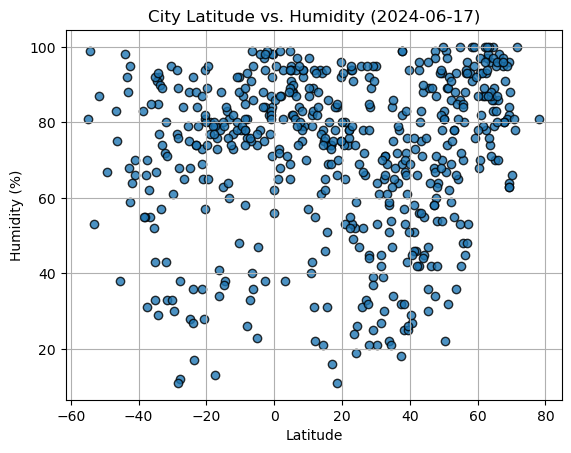

In [14]:
# Build scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

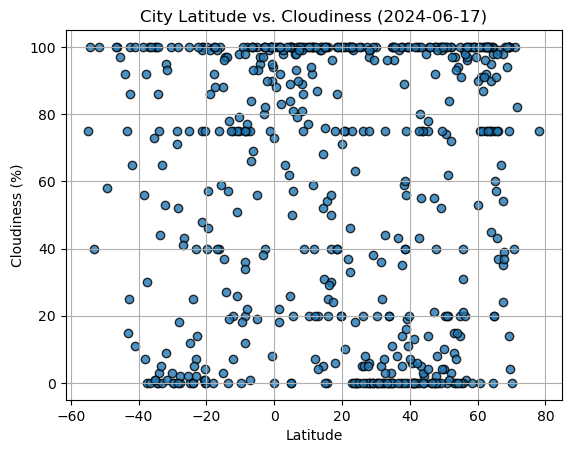

In [15]:
# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

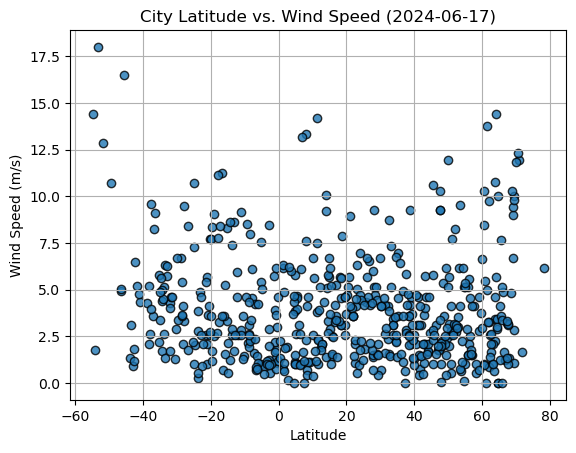

In [16]:
# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress




In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mandali,33.7499,45.5541,17.49,22,0,3.44,IQ,1729891523
4,takoradi,4.8845,-1.7554,25.74,91,100,3.88,GH,1729891227
5,jamestown,42.0970,-79.2353,12.80,66,100,3.09,US,1729891404
6,chaiyaphum,15.7500,102.0000,24.81,86,100,1.44,TH,1729891527
7,kannus,63.9000,23.9000,6.04,96,90,3.41,FI,1729891528


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,25.30,82,99,5.71,GQ,1729891520
1,port-aux-francais,-49.3500,70.2167,2.25,67,58,10.73,TF,1729891521
2,waitangi,-43.9535,-176.5597,14.34,98,92,1.34,NZ,1729891522
8,novo aripuana,-5.1206,-60.3797,38.90,23,56,1.00,BR,1729891529
10,invercargill,-46.4000,168.3500,8.34,75,100,4.92,NZ,1729891531


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7191367155864444


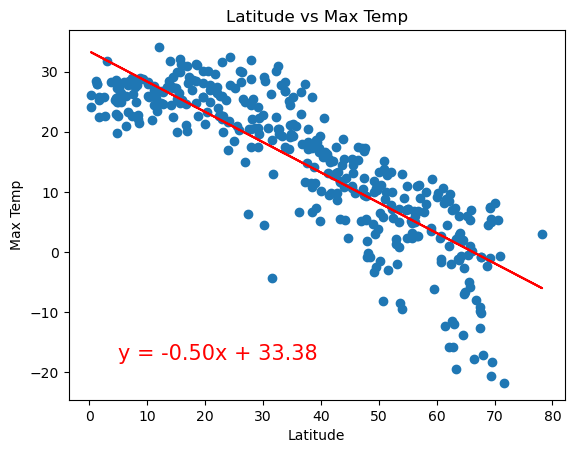

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-") 
plt.annotate(line_eq, (5, -18), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 0.576743972378258


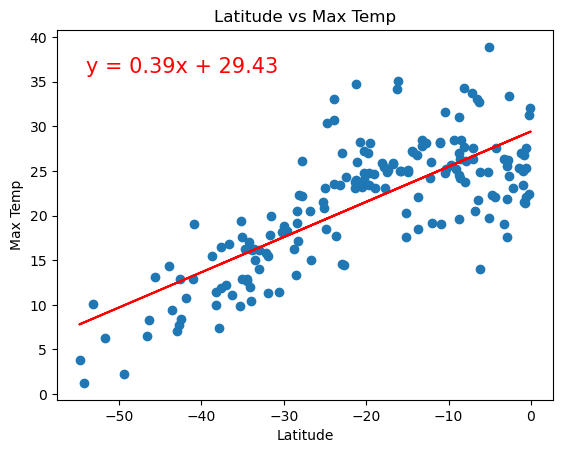

In [54]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-") 
plt.annotate(line_eq, (-54, 36), fontsize=15, color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** In the northern hemisphere, as the latitude increases, the max temperatures decrease, while in the southern hemisphere the increasing latitude leads to warmer weather. Therefore, the norther hemisphere has an inverse correlation between temp and latitude.  There is a strong correlation between latitude and temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0144040846988433


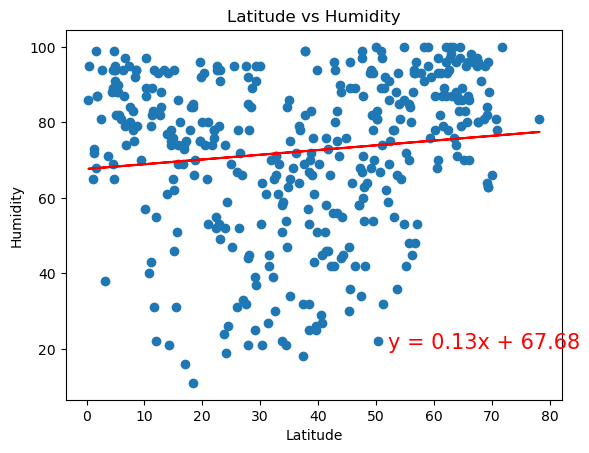

In [56]:
# Linear regression on Northern Hemisphere for Humidity vs Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (52, 20), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 0.018266547008426098


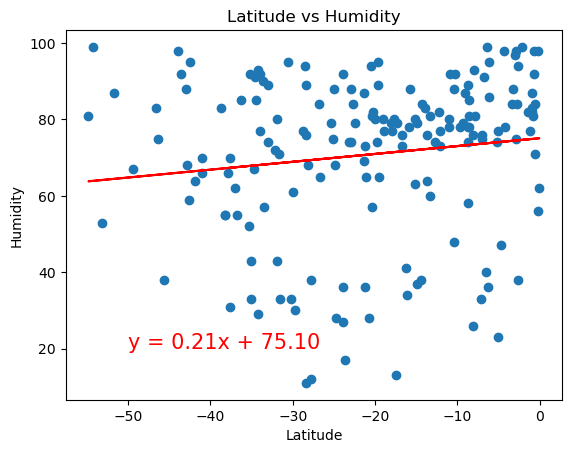

In [59]:
# Linear regression on Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** There is no correlation between latitude and humidity in either of the prior two plots.  Therefore latitude has almost no influence on humidity levels.  

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.000712376498240247


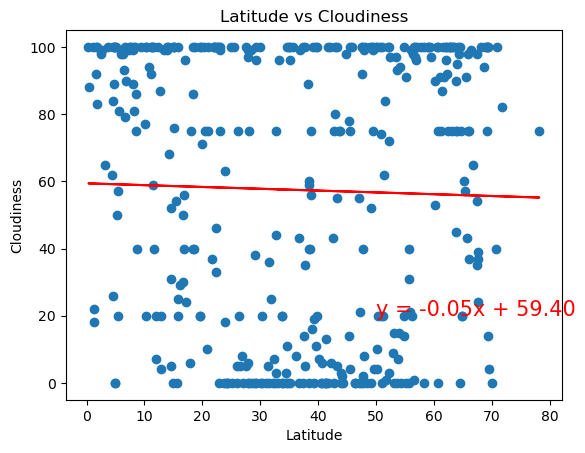

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 0.022095706046674553


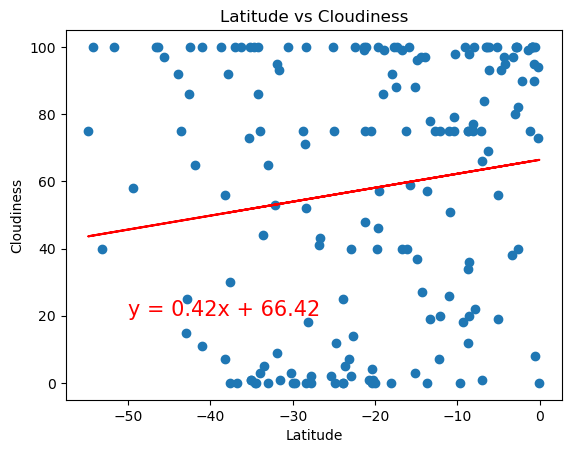

In [62]:
# Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** The r^2-value is close to zero on both of these prior two charts, meaning latitude has little to no correlation to cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.005085539690622812


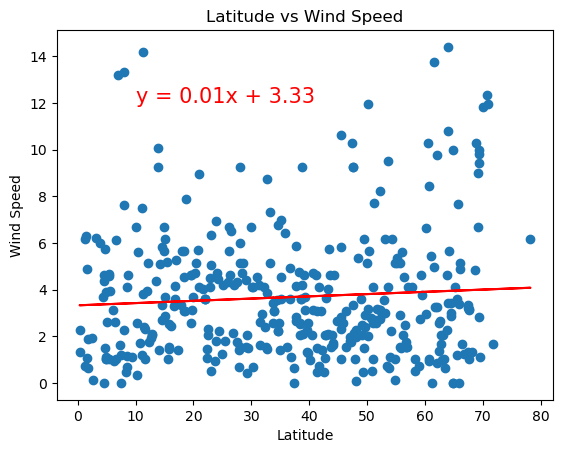

In [66]:
# Northern Hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  
plt.annotate(line_eq, (10, 12), fontsize=15, color="red")  
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 0.11802996210646026


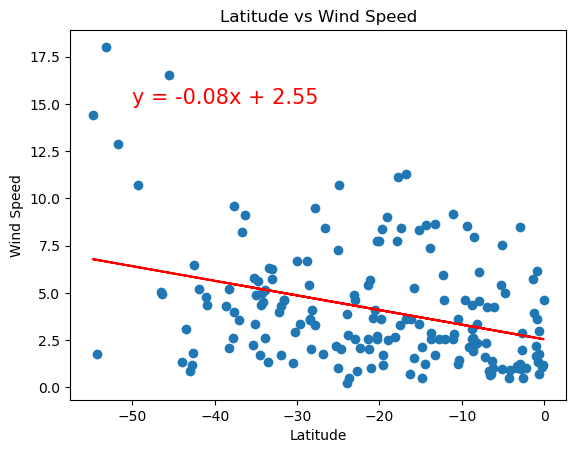

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-50, 15), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:**  For both of these plots, the correlation between latitude and wind is weak.  For the northern hemisphere, a very weak correlation exists between a higher latitude and slight increase in wind speed.  In the southern hemisphere, increasing latitude means less wind with a slightly stronger correlation.